<a href="https://colab.research.google.com/github/MaliniVibin1502/SQL-projects/blob/main/EmployeeSQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a SQL project done from the files from github repository Apex8/ Employee-Database-SQL-mystery a SQL challenge. The repository had 6 CSV files.

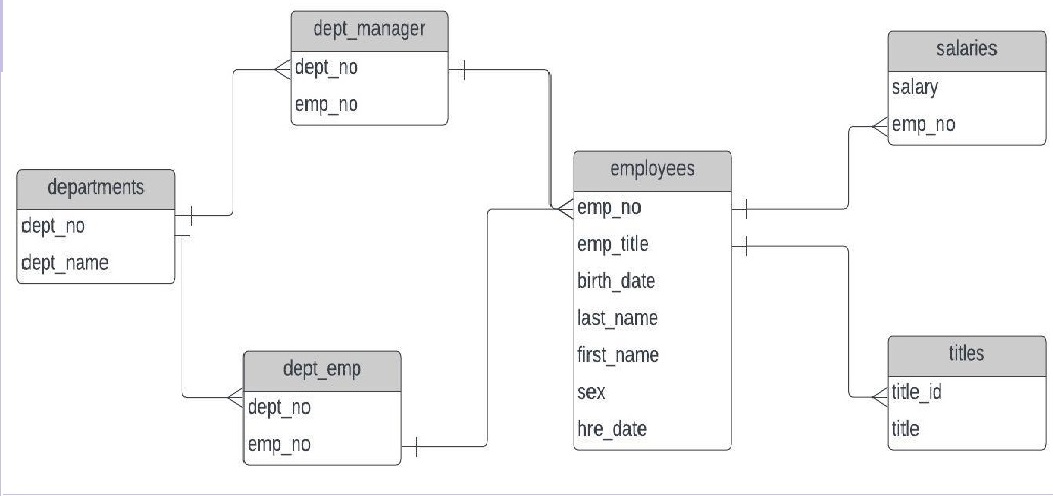
I converted the CSV files into a db file using Sqlite DB browser and saved in Google drive and mounted it into Gogle Colab for the project. The project is done by installing pymysql into this Colab notebook and using %%sql for SQL querying.

The questions mentioned below are from the challenge in the above mentioned repository.


In [ ]:
!pip install pymysql

In [ ]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [ ]:
%sql sqlite:////content/drive/MyDrive/ColabNotebooks/Employee.db

In [ ]:
%%sql
SELECT * FROM employees
LIMIT 5

 * sqlite:////content/drive/MyDrive/ColabNotebooks/Employee.db
Done.


emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [ ]:
%%sql
SELECT * FROM departments
LIMIT 9

 * sqlite:////content/drive/MyDrive/ColabNotebooks/Employee.db
Done.


dept_no,dept_name
d001,Marketing
d002,Finance
d003,Human Resources
d004,Production
d005,Development
d006,Quality Management
d007,Sales
d008,Research
d009,Customer Service


Listing first name, last name, and hire date for employees who were hired in 1986.

In [ ]:
%%sql
SELECT first_name,last_name,hire_date
FROM employees
WHERE hire_date LIKE "%1986"
LIMIT 10



 * sqlite:////content/drive/MyDrive/ColabNotebooks/Employee.db
Done.


first_name,last_name,hire_date
Eran,Cusworth,11/14/1986
Bojan,Zallocco,10/14/1986
Nevio,Demizu,5/18/1986
Ziva,Vecchi,7/3/1986
Mohit,Speek,1/14/1986
Qunsheng,Speer,2/13/1986
Dines,Encarnacion,8/2/1986
Harngdar,Swick,5/28/1986
Freyja,Uhrig,12/20/1986
Zhenhua,Milicic,8/4/1986


Listing the following details of each employee: employee number, last name, first name, sex, and salary.


In [ ]:
%%sql
SELECT employees.emp_no, employees.last_name, employees.first_name, employees.sex, salaries.salary
FROM employees
JOIN salaries
 ON salaries.emp_no = employees.emp_no
LIMIT 10


 * sqlite:////content/drive/MyDrive/ColabNotebooks/Employee.db
Done.


emp_no,last_name,first_name,sex,salary
473302,Zallocco,Hideyuki,M,40000
475053,Delgrande,Byong,F,53422
57444,Babb,Berry,F,48973
421786,Verhoeff,Xiong,M,40000
282238,Baumann,Abdelkader,F,40000
263976,Cusworth,Eran,M,40000
273487,Parfitt,Christoph,M,56087
461591,Samarati,Xudong,M,40000
477657,Magliocco,Lihong,M,54816
219881,Speek,Kwangyoen,F,40000


Listing the manager of each department with the following information: department number, department name, the manager's employee number, last name, first name.

In [ ]:
%%sql
SELECT departments.dept_no, departments.dept_name, dept_manager.emp_no, employees.last_name, employees.first_name
FROM departments JOIN dept_manager ON departments.dept_no = dept_manager.dept_no
JOIN employees ON dept_manager.emp_no = employees.emp_no
LIMIT 10



 * sqlite:////content/drive/MyDrive/ColabNotebooks/Employee.db
Done.


dept_no,dept_name,emp_no,last_name,first_name
d001,Marketing,110022,Markovitch,Margareta
d001,Marketing,110039,Minakawa,Vishwani
d002,Finance,110085,Alpin,Ebru
d002,Finance,110114,Legleitner,Isamu
d003,Human Resources,110183,Ossenbruggen,Shirish
d003,Human Resources,110228,Sigstam,Karsten
d004,Production,110303,Wegerle,Krassimir
d004,Production,110344,Cools,Rosine
d004,Production,110386,Kieras,Shem
d004,Production,110420,Ghazalie,Oscar


Listing the department of each employee with the following information: employee number, last name, first name, and department name.


In [ ]:
%%sql
SELECT dept_emp.emp_no, employees.last_name, employees.first_name, departments.dept_name
FROM dept_emp JOIN employees ON dept_emp.emp_no = employees.emp_no
JOIN departments ON dept_emp.dept_no = departments.dept_no
LIMIT 10

 * sqlite:////content/drive/MyDrive/ColabNotebooks/Employee.db
Done.


emp_no,last_name,first_name,dept_name
10001,Facello,Georgi,110511
10001,Facello,Georgi,110567
10001,Facello,Georgi,Development
10002,Simmel,Bezalel,111035
10002,Simmel,Bezalel,111133
10002,Simmel,Bezalel,Sales
10003,Bamford,Parto,110303
10003,Bamford,Parto,110344
10003,Bamford,Parto,110386
10003,Bamford,Parto,110420


List first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B."

In [ ]:
%%sql
SELECT first_name, last_name, sex
FROM employees
WHERE first_name = "Hercules" AND last_name LIKE "B%"
LIMIT 10


 * sqlite:////content/drive/MyDrive/ColabNotebooks/Employee.db
Done.


first_name,last_name,sex
Hercules,Baer,M
Hercules,Biron,F
Hercules,Birge,F
Hercules,Berstel,F
Hercules,Bernatsky,M
Hercules,Bail,F
Hercules,Bodoff,M
Hercules,Benantar,F
Hercules,Basagni,M
Hercules,Bernardinello,F


Listing all employees in the Sales department, including their employee number, last name, first name, and department name.

In [ ]:
%%sql
SELECT dept_emp.dept_no,departments.dept_name, employees.emp_no,employees.last_name,employees.first_name
FROM dept_emp
JOIN departments ON departments.dept_no = dept_emp.dept_no JOIN employees ON dept_emp.emp_no = employees.emp_no
WHERE departments.dept_name = "Sales"
LIMIT 10

 * sqlite:////content/drive/MyDrive/ColabNotebooks/Employee.db
Done.


dept_no,dept_name,emp_no,last_name,first_name
d007,Sales,10002,Simmel,Bezalel
d007,Sales,10016,Cappelletti,Kazuhito
d007,Sales,10034,Swan,Bader
d007,Sales,10041,Lenart,Uri
d007,Sales,10050,Dredge,Yinghua
d007,Sales,10053,Zschoche,Sanjiv
d007,Sales,10060,Billingsley,Breannda
d007,Sales,10061,Herber,Tse
d007,Sales,10068,Brattka,Charlene
d007,Sales,10087,Eugenio,Xinglin


Listing all employees in the Sales and Development departments, including their employee number, last name, first name, and department name.

In [ ]:
%%sql
SELECT dept_emp.emp_no,departments.dept_name,employees.last_name, employees.first_name
FROM dept_emp
JOIN employees ON dept_emp.emp_no=employees.emp_no JOIN departments ON departments.dept_no=dept_emp.dept_no
WHERE departments.dept_name="Sales" OR departments.dept_name="Development"
LIMIT 10

 * sqlite:////content/drive/MyDrive/ColabNotebooks/Employee.db
Done.


emp_no,dept_name,last_name,first_name
10001,Development,Facello,Georgi
10006,Development,Preusig,Anneke
10008,Development,Kalloufi,Saniya
10012,Development,Bridgland,Patricio
10014,Development,Genin,Berni
10018,Development,Peha,Kazuhide
10021,Development,Erde,Ramzi
10022,Development,Famili,Shahaf
10023,Development,Montemayor,Bojan
10025,Development,Heyers,Prasadram



In descending order, list the frequency count of employee last names, i.e., how many employees share each last name.

In [ ]:
%%sql
SELECT COUNT(*) AS totalnos, first_name, last_name
FROM employees
GROUP BY last_name
ORDER BY totalnos desc
LIMIT 30

 * sqlite:////content/drive/MyDrive/ColabNotebooks/Employee.db
Done.


totalnos,first_name,last_name
226,Wojceich,Baba
223,Dinkar,Gelosh
223,Aimee,Coorg
222,Shaowei,Sudbeck
222,Zeljko,Farris
221,Radhakrishnan,Adachi
220,Georgi,Osgood
218,Jianwen,Neiman
218,Oscar,Masada
218,Barna,Mandell
